# 課題10

配点
- Q1 10P

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

## Q1
データ分析の実践のノートブックで使用したデータセットについて、特徴量の選択、特徴量の変換や組み合わせによる新たな特徴量の作成、などを行い、それらの特徴量を用いたモデルの学習と評価を行ってください。モデルは`LinearRegression`を使ってください。

どのような着想の元で特徴量の選択や作成を行ったのかについても報告してください。

以下では例として、`alcohol`と`sulphates`の特徴量に加えて、それらの特徴量を掛け合わせた交差項となる特徴量を新たに作成し、これらの特徴量を用いてモデルの学習と交差検証による評価を行っています。

In [2]:
wine = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
X=wine[ ['sulphates', 'alcohol']].values
y=wine[['quality']].values

# 標準化と線形回帰モデルのパイプライン
pipe=make_pipeline(StandardScaler(), LinearRegression())

# 交差検証
scores = cross_val_score(pipe, X, y, scoring='neg_mean_squared_error', cv=10)
print( -scores.mean()) # 平均二乗誤差

0.4908615524969576


In [4]:
X=wine[ ['sulphates', 'alcohol']].values
y=wine[['quality']].values

# 'sulphates'と'alcohol'の交差項となる特徴量
new_feature=X[:,0]*X[:,1]

#  特徴量の追加
X=np.insert(X, 0, new_feature, axis=1)

# 標準化と線形回帰モデルのパイプライン
pipe=make_pipeline(StandardScaler(), LinearRegression())

# 交差検証
scores = cross_val_score(pipe, X, y, scoring='neg_mean_squared_error', cv=10)
print( -scores.mean()) # 平均二乗誤差

0.4798464310510474


[0.41587262 0.36478067 0.23329516]
[0.4351849  0.46879418 2.65921337]


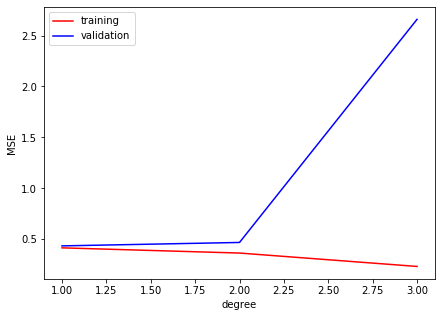

In [5]:
### このセルにコードを記入してください ###

X=wine.drop("quality", axis=1).values
y=wine[['quality']].values

# 多項式特徴量と標準化と線形回帰モデルのパイプライン
pipe=make_pipeline(PolynomialFeatures(), StandardScaler(), LinearRegression())

# 次数
degree = [1, 2, 3]

# validation_curve:
#param_name引数...指定されたハイパーパラメータ（ここでは多項式の次数）
#param_range引数...指定した値ごとに交差検証（cv引数でfold数を指定）によりモデルの評価を行い、
#各交差検証の訓練データと検証データの予測精度（scoring引数で指標を指定）を返します。

# バリデーション曲線
train_scores, valid_scores = validation_curve(pipe, X, y, 
                                              param_name='polynomialfeatures__degree',  param_range=degree, 
                                              scoring="neg_mean_squared_error", cv=10)

print(-train_scores.mean(axis=1)) # 訓練データの誤差
print(-valid_scores.mean(axis=1)) # 検証データの誤差

plt.figure(figsize=(7,5))
plt.xlabel('degree')
plt.ylabel('MSE')
plt.plot(degree, -train_scores.mean(axis=1), color='red', label='training')
plt.plot(degree, -valid_scores.mean(axis=1), color='blue', label='validation')
plt.legend();



#多項式の次数を増やすと訓練データの誤差は減少していきますが
#検証データの誤差は3次の多項式で急激に増加し、過学習がおこっていることがわかる
# よって、２次項が良さそうだ

In [7]:
### このセルにコードを記入してください ###

X=wine.drop("quality", axis=1).values
y=wine[['quality']].values

#標準化
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
#特徴量選択-1

#特徴量の分散や同じ特徴量が存在するのかを確認
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X)

# get_supportで保持するデータのみをTrue値、そうでないものはFalse値を返します
print(sum(sel.get_support()))#変化なし

11


In [20]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
#特徴量選択-2
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=2) #SelectKBest
selector.fit(X, y)
mask = selector.get_support()    # 各特徴量を選択したか否かのmaskを取得
print(mask) #wine.head()よりTrueとなっているのはvolatile acidity, alcohol
#上記の２つだけ使って線形回帰をしていく

[False  True False False False False False False False False  True]


/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
X=wine[ ['volatile acidity', 'alcohol']].values
y=wine[['quality']].values

# 標準化と線形回帰モデルのパイプライン
pipe=make_pipeline(StandardScaler(), LinearRegression())

# 交差検証
scores = cross_val_score(pipe, X, y, scoring='neg_mean_squared_error', cv=10)
print( -scores.mean()) # 平均二乗誤差

0.44915454797733056


このマークダウンセルに説明を記入してください（セルをダブルクリックすると編集できます）<br/>

* 資料コードにより、2次特徴量を選ぶのが最適だと判断しました。
* このwineデータを特徴づけている特徴量を重要度の高い順から2つ選ぼうと思いました。(⇒SelectKBest)